# About the experiment
Aim: Determine if we can differentiate between single and multiple CNOTs being applied at the same time. Bonus if we can determine which CNOT is being applied exactly.

To find out we take a 3 qubit chain for the victim qubits. That mean there are 2 links and each link can act both ways. So the link can be (OFF, +, -).

1. No CNOTs
2. 1 CNOT - 4 possibilities
3. 2 CNOTs - 8 possibilities
    1. (+, +) - 2 possibilites
    2. (+, -) - 2 possibility
    3. (-, +) - 2 possibilites
    4. (-, -) - 2 possibilites

Therefore, total 13 possible circuits with a max of 2 CNOTs.


Backend: IBM Lagos.

On this backend we can choose 6 such 3 qubit chains.

Since we want to be able to detect upto two CNOTs we shall snoop for about 2 CNOT durations.

<!-- Victim CNOTs applied: [ (3, 5) ] \
Attacker Qubits: (0, 1, 2, 4, 6) -->

# Imports

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from common import attacker

# Parameters

In [2]:
num_of_atk_qubits = 5
num_of_vic_qubits = 2
reps = 3

# Attack Circuit

In [3]:
atk_qregs = QuantumRegister(num_of_atk_qubits, name='atk')
snooping_delay_dt = Parameter('snoop_delay')

cregs_list = [ClassicalRegister(num_of_atk_qubits, name='atk_rep_{}'.format(i)) for i in range(reps)]

In [5]:
atk_qc = QuantumCircuit(atk_qregs, *cregs_list)

for i in range(reps - 1):
    atk_qc.h(atk_qregs)
    atk_qc.delay(snooping_delay_dt, atk_qregs)
    atk_qc.h(atk_qregs)
    attacker.measure_and_conditional_reset(atk_qc, atk_qregs, cregs_list[i])
    atk_qc.barrier()
    # atk_qc.append(measure_all_conditional_reset_qc, atk_qregs, cregs_list[i])
atk_qc.h(atk_qregs)
atk_qc.delay(snooping_delay_dt, atk_qregs)
atk_qc.h(atk_qregs)
atk_qc.measure(atk_qregs, cregs_list[-1])

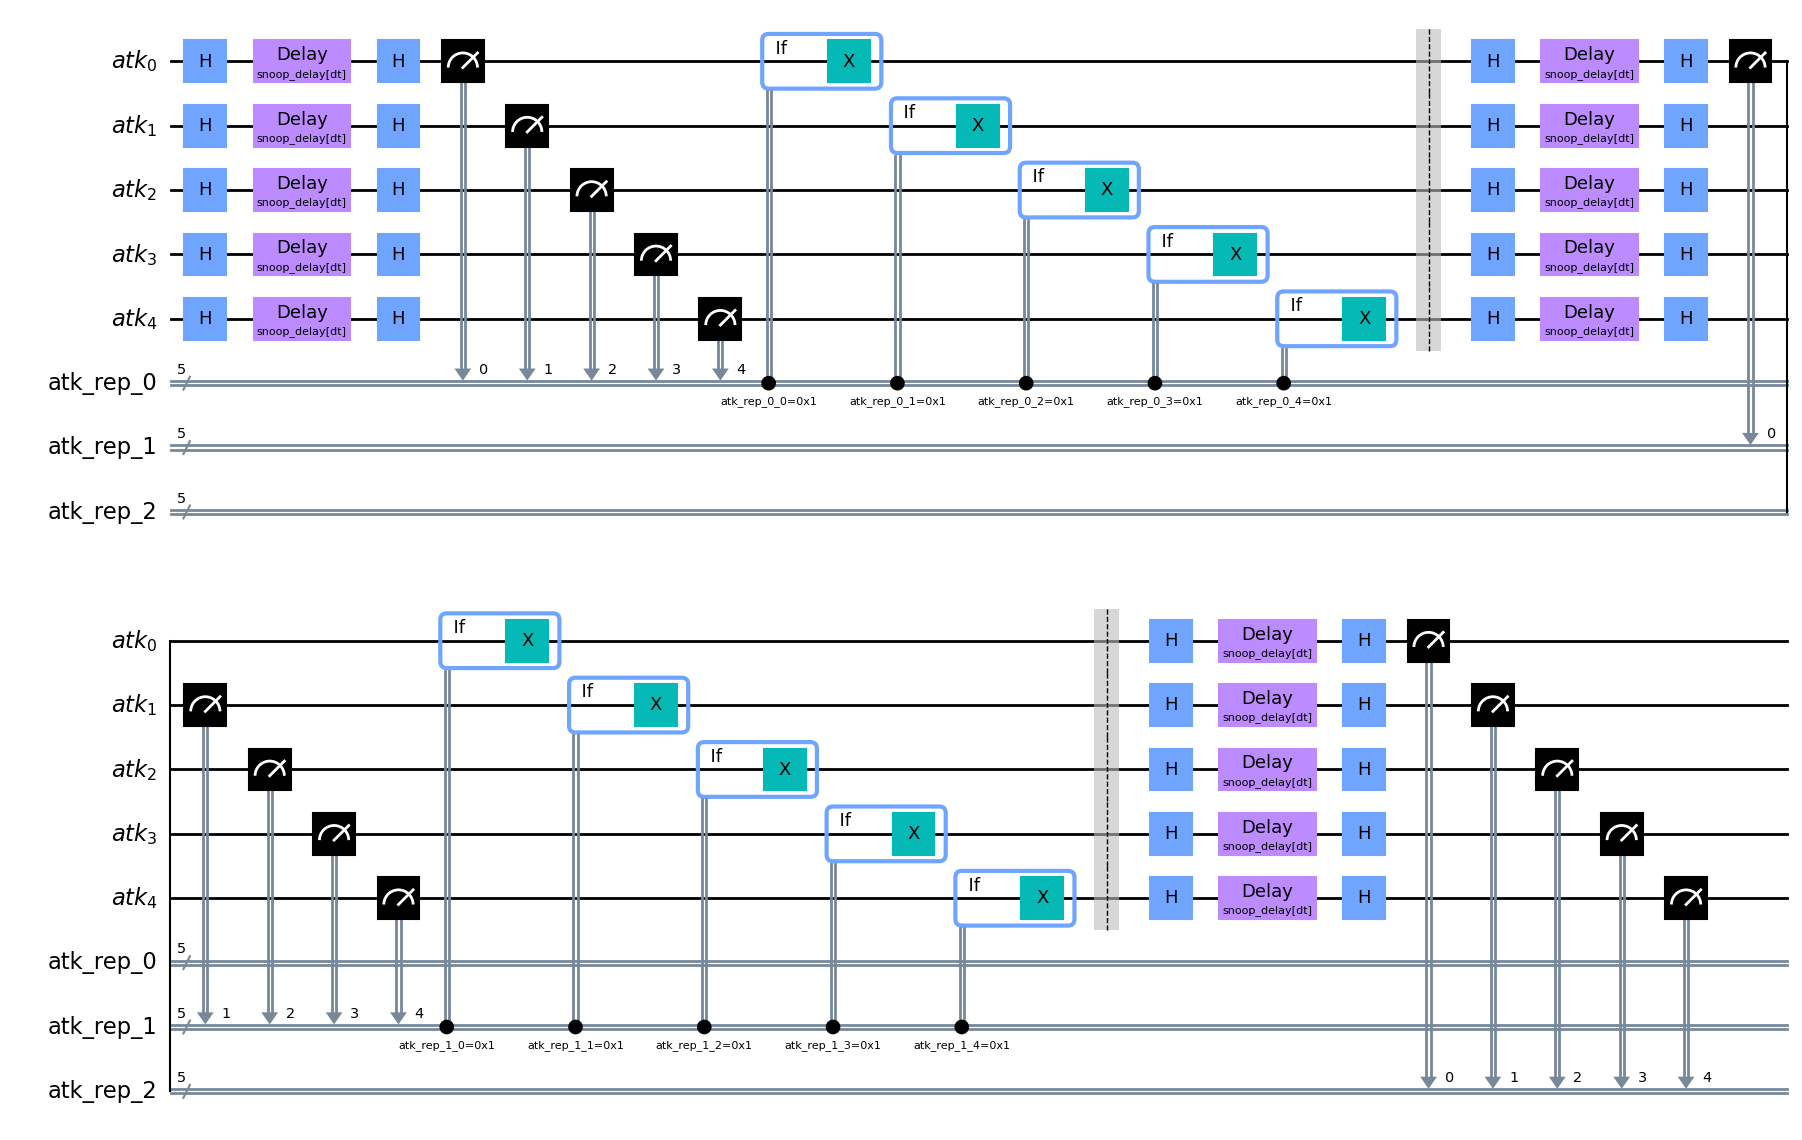

In [6]:
atk_qc.draw('mpl')

# Victim Circuits

In [ ]:
vic_qregs = QuantumRegister(num_of_vic_qubits, name='vic')

# Full Circuits

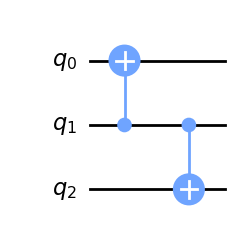

In [31]:
qc = QuantumCircuit(3)
qc.cx(1, 0)
qc.cx(1, 2)
qc.draw('mpl')

In [32]:
import numpy as np
import pickle

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile
# from qiskit.tools.jupyter import *

from qiskit_ibm_provider import IBMProvider
# from qiskit_ibm_runtime.options import Options
from datetime import datetime
from qiskit import visualization
from qiskit.tools.monitor import job_monitor

## For DD exps
from qiskit.transpiler import PassManager, InstructionDurations
from qiskit.transpiler.passes import ALAPScheduleAnalysis, PadDynamicalDecoupling, DynamicalDecoupling, ASAPScheduleAnalysis
from qiskit.circuit.library import XGate
from qiskit.visualization import timeline_drawer

from collections import defaultdict
from itertools import combinations

##for plotting
from matplotlib import pyplot as plt
# import seaborn as sns

from math import pi

try:
    print(provider)
except NameError:
    provider = IBMProvider(instance='ibm-q-cqe/uw-madison/tannu-project')
## Configuring the IBM backend 

# HUB, GROUP, PROJECT = ['ibm-q-cqe', 'uw-madison', 'tannu-project']
# HUB, GROUP, PROJECT = ['ibm-q-cqe', 'internal', 'reservations']

backends = ['ibm_lagos', 'ibm_perth', 'ibm_nairobi']
backend_name = backends[0]
backend = provider.get_backend(backend_name)

<IBMProvider>


In [33]:
from qiskit.compiler import transpile

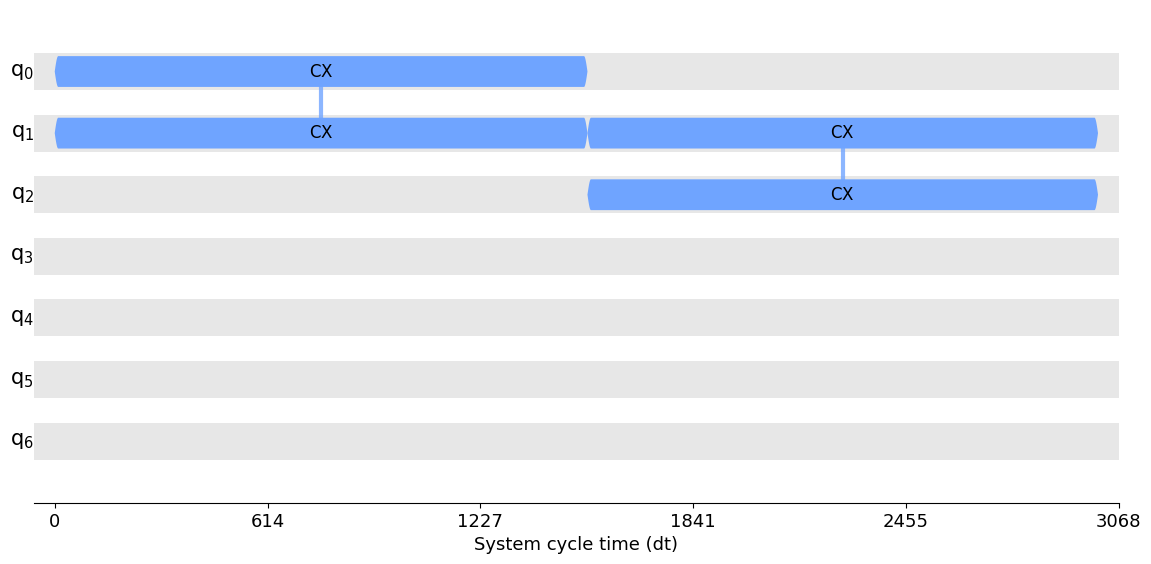

In [34]:
from qiskit import QuantumCircuit, transpile, schedule
from qiskit.visualization.timeline import draw
from qiskit.providers.fake_provider import FakeLagosV2
 
# qc = QuantumCircuit(2)
# qc.h(0)
# qc.cx(0,1)
 
tqc = transpile(qc, FakeLagosV2(), scheduling_method='alap', layout_method='trivial')
draw(tqc)

In [ ]:
# qc = QuantumCircuit(vic_qregs, atk_qregs, *cregs_list)
# qc.draw('mpl')

In [ ]:
# qc = measure_all_and_conditional_reset(5)
# qc.draw('mpl')

In [ ]:
# full_tqcs = pm.run(full_qcs)
# len(full_tqcs)
# ## Timeline Viewer
# from qiskit.visualization import timeline_drawer

# i = 18
# display(timeline_drawer(full_tqcs[i]))